In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style ('ticks')

## Dataset Basics

In [158]:
# Query 1

# load iris data from csv to pandas dataframe
iris = pd.read_csv('iris.csv')
# iris_pd = pd.DataFrame(
#     data = np.c_[iris['data'], iris['target']],
#     columns= iris['feature_names'] + ['target']
# )

# print shape of data
iris_shape = iris.shape
print(f"Shape of the data is {iris_shape}.")

# print type of data
iris_type = type(iris)
print(f"Type of the data is {iris_type}.")

# print first 3 rows of data
iris_head_3 = iris.head(3)
print(f"First three rows of the data are as follows: \n{iris_head_3}.")

Shape of the data is (150, 5).
Type of the data is <class 'pandas.core.frame.DataFrame'>.
First three rows of the data are as follows: 
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa.


In [159]:
# Query 2

# load iris data with scikit-learn
# iris = load_iris()

# print keys of data
iris_keys = iris.keys()
print(f"Keys of the data include {*iris_keys,}.")

# print number of rows-columns of data
print(f"Iris data has {iris_shape[0]} rows and {iris_shape[1]} columns.")

# print feature names of data
iris_feature_names = iris.columns  # +.values
print(f"Feature names of the data include {*iris_feature_names,}.")

# describe data with basic statistical details
iris_description = iris.describe()

Keys of the data include ('sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety').
Iris data has 150 rows and 5 columns.
Feature names of the data include ('sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety').


In [160]:
# Query 3

# get number of observations
iris_observations = len(iris.index)
print(f"Data has {iris_observations} observations.")

# get number of missing values
iris_missing = pd.isna(iris).sum()
print(f"Data has {*iris_missing,} missing values in each column.")

# get number of NaN values
iris_nan = iris.isnull().sum().sum()
print(f"Data has {iris_nan} NaN values in total.")

Data has 150 observations.
Data has (0, 0, 0, 0, 0) missing values in each column.
Data has 0 NaN values in total.


In [161]:
# Query 4

# create 2D array with ones on diagonal and zeros elsewhere
diag = np.eye(2)
print(f"The requested 2D array is \n{diag}.")

# convert to scipy sparse matrix
diag_sparse = sparse.csr_matrix(diag)
print(f"The requested matrix is \n{diag_sparse}.")

The requested 2D array is 
[[1. 0.]
 [0. 1.]].
The requested matrix is 
  (0, 0)	1.0
  (1, 1)	1.0.


In [162]:
# Query 5

# print description of data
print(f"Data can be described as follows: \n{iris_description}.")

Data can be described as follows: 
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000.


In [216]:
# Query 6

# get observations of species
iris_species = iris['variety'].value_counts()
print(f"Observations of each species amount to: \n{iris_species}.")

Observations of each species amount to: 
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64.


In [164]:
# Query 7

# add and then drop the ID column
iris.insert(0, 'ID', range(1, len(iris) + 1))
iris_mod = iris.drop('ID', axis=1)

# print modified dataframe
print(f"The dataframe after adding the column is: \n{iris.head()}"
      f"\nAfter modification, it is: \n{iris_mod.head()}")

The dataframe after adding the column is: 
   ID  sepal.length  sepal.width  petal.length  petal.width variety
0   1           5.1          3.5           1.4          0.2  Setosa
1   2           4.9          3.0           1.4          0.2  Setosa
2   3           4.7          3.2           1.3          0.2  Setosa
3   4           4.6          3.1           1.5          0.2  Setosa
4   5           5.0          3.6           1.4          0.2  Setosa
After modification, it is: 
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [165]:
# Query 8

# access data with indices
iris_iloc = iris.iloc[0:4, 1:5].values
print(f"First four columns in first four rows accessed with indices are: \n{iris_iloc}.")

# access data with labels
iris.set_index("ID", inplace=True)
iris_loc = iris.loc[1:4, "sepal.length":"petal.width"].values
print(f"First four columns in first four rows accessed with labels are: \n{iris_loc}.")

First four columns in first four rows accessed with indices are: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]].
First four columns in first four rows accessed with labels are: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]].


## Dataset Visualization

Text(0.5, 1.0, 'General Statistics of Iris Data')

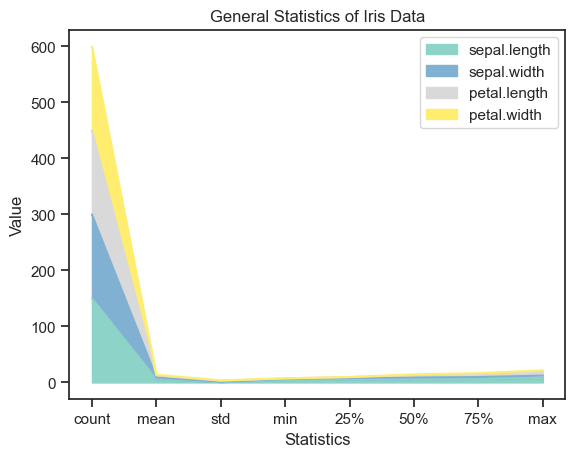

In [292]:
# Query 1

# create plot of description
iris_description.plot(kind='area', colormap='Set3')

plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("General Statistics of Iris Data")

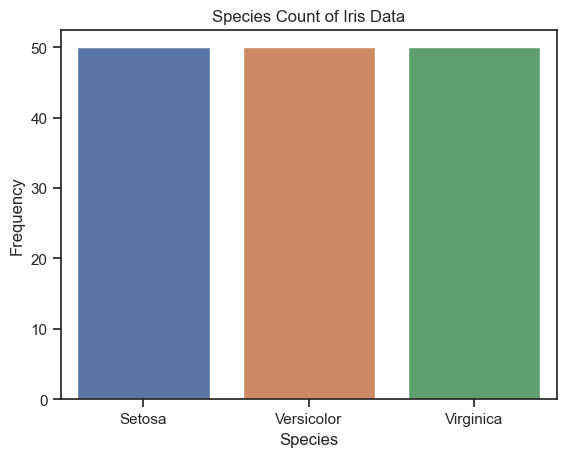

In [222]:
# Query 2

# create plot of frequency
bar = sns.countplot(
    data=iris, x='variety'
).set(
    xlabel='Species', ylabel='Frequency', 
    title='Species Count of Iris Data'
)
# iris_species.plot(kind='bar', figsize=(12, 8), color=['orange', 'green', 'blue'], rot=0)

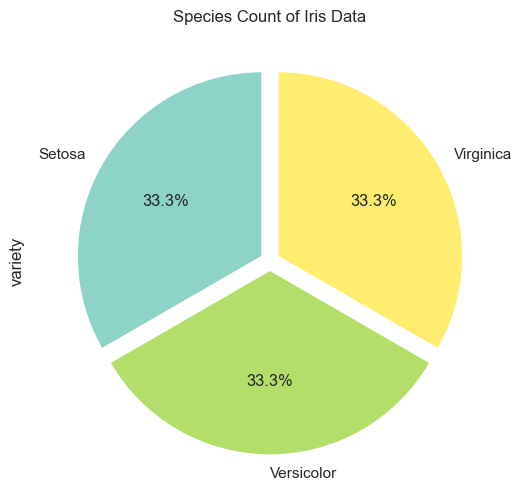

In [290]:
# Query 3

# create pie plot of species frequency
pie = iris_species.plot(
    kind='pie', figsize=(10, 6), colormap='Set3', 
    explode=[0.05, 0.05, 0.05], autopct='%.1f%%', startangle=90
).set(
    title='Species Count of Iris Data'
)

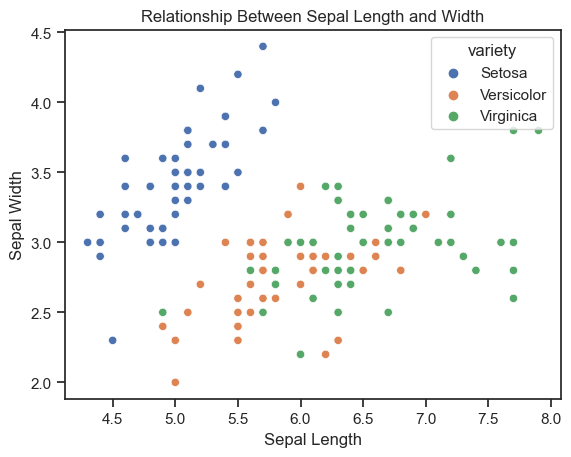

In [283]:
# Query 4

# create scatter plot of sepal length-width
scat_sep = sns.scatterplot(
    data=iris, x='sepal.length', y='sepal.width', hue='variety'
).set(
    xlabel='Sepal Length', ylabel='Sepal Width', 
    title='Relationship Between Sepal Length and Width'
)

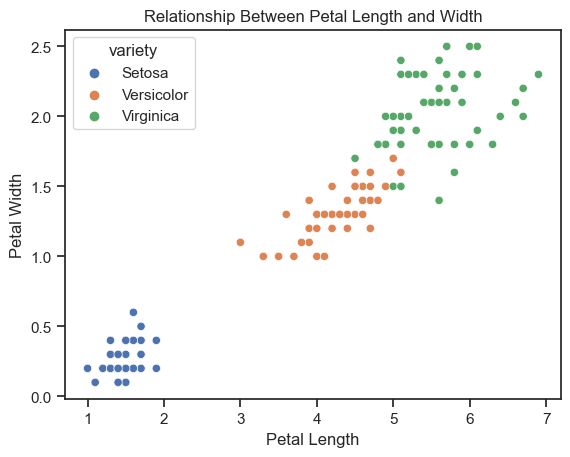

In [282]:
# Query 5

# create scatter plot of petal length-width
scat_pet = sns.scatterplot(
    data=iris, x='petal.length', y='petal.width', hue='variety'
).set(
    xlabel='Petal Length', ylabel='Petal Width', 
    title='Relationship Between Petal Length and Width'
)

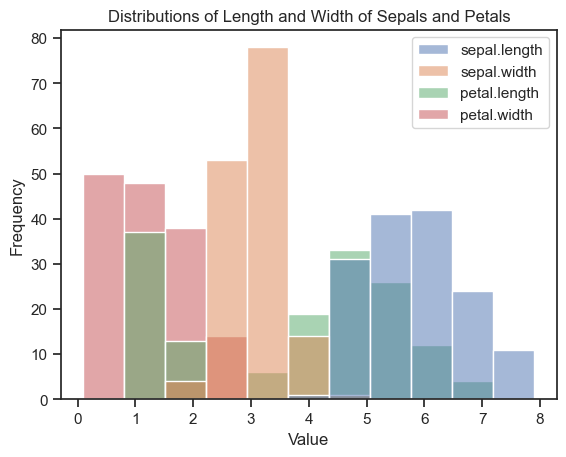

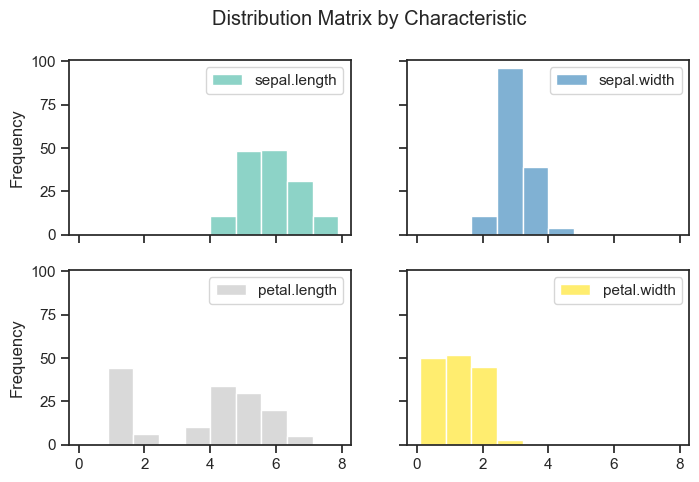

In [281]:
# Query 6

# create combined histogram plot of lengths and widths
hist = sns.histplot(
    data=iris
).set(
    xlabel='Value', ylabel='Frequency', 
    title='Distributions of Length and Width of Sepals and Petals'
)

# create histogram matrix plots of lengths and widths
hist_matrix = iris_mod.plot(
    kind='hist', subplots=True, figsize=(8, 5),
    layout=[2, 2], colormap='Set3', edgecolor='white',
    sharex=True, sharey=True,
    xlabel='Value', ylabel='Frequency', 
    title='Distribution Matrix by Characteristic')

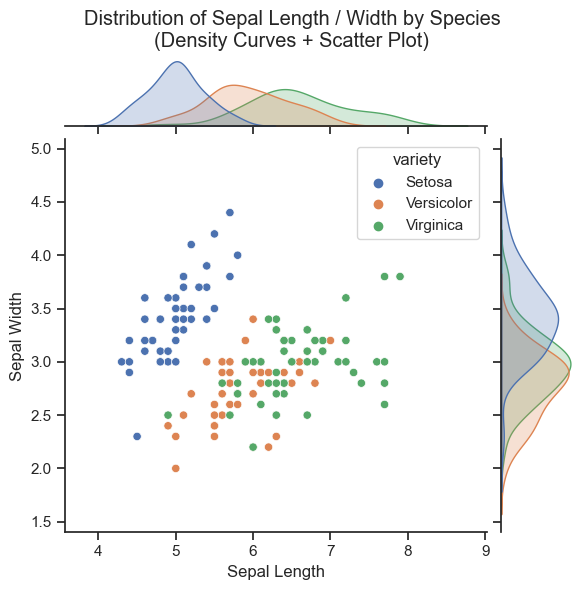

In [261]:
# Query 7

# create joint plot of sepal length and width
joint_scat = sns.jointplot(
    data=iris, x='sepal.length', y='sepal.width', hue='variety'
)

joint_scat.set_axis_labels('Sepal Length', 'Sepal Width')
joint_scat.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                        '(Density Curves + Scatter Plot)')
joint_scat.fig.subplots_adjust(top=0.9)

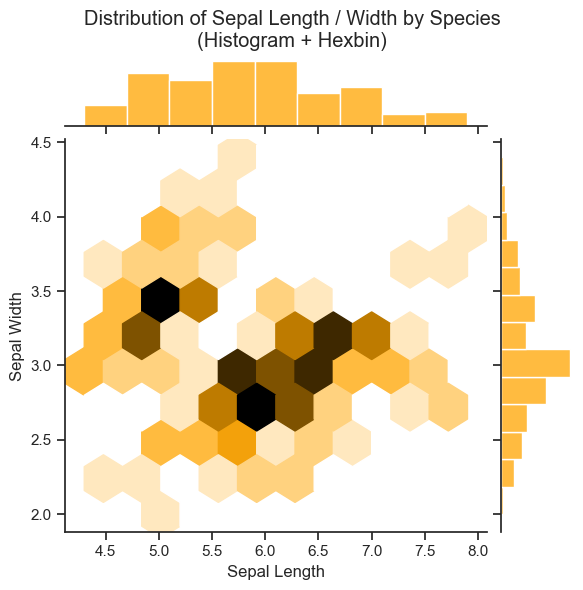

In [260]:
# Query 8

# create joint plot of sepal length and width
joint_hex = sns.jointplot(
    data=iris, x='sepal.length', y='sepal.width', kind='hex', color='orange'
)

joint_hex.set_axis_labels('Sepal Length', 'Sepal Width')
joint_hex.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                       '(Histogram + Hexbin)')
joint_hex.fig.subplots_adjust(top=0.9)

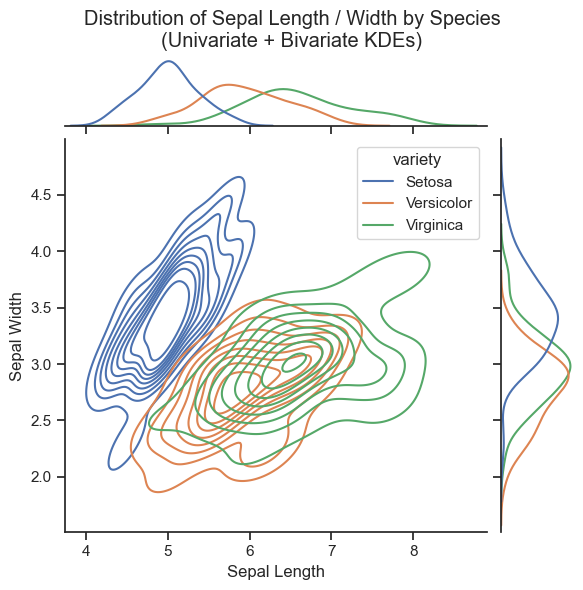

In [259]:
# Query 9

# create joint plot of sepal length and width
joint_kde_hue = sns.jointplot(
    data=iris, x='sepal.length', y='sepal.width', kind='kde', hue='variety'
)

joint_kde_hue.set_axis_labels('Sepal Length', 'Sepal Width')
joint_kde_hue.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                           '(Univariate + Bivariate KDEs)')
joint_kde_hue.fig.subplots_adjust(top=0.9)

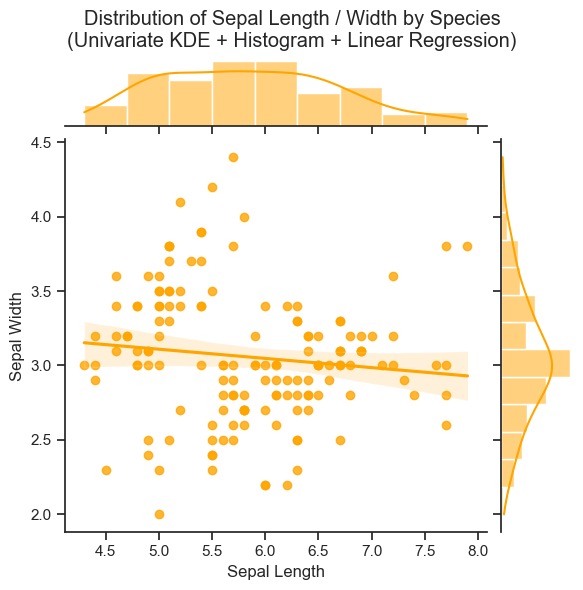

In [258]:
# Query 10

# create joint plot of sepal length and width
joint_reg = sns.jointplot(data=iris, x='sepal.length', y='sepal.width', kind='reg', color='orange')

joint_reg.set_axis_labels('Sepal Length', 'Sepal Width')
joint_reg.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                           '(Univariate KDE + Histogram + Linear Regression)')
joint_reg.fig.subplots_adjust(top=0.9)

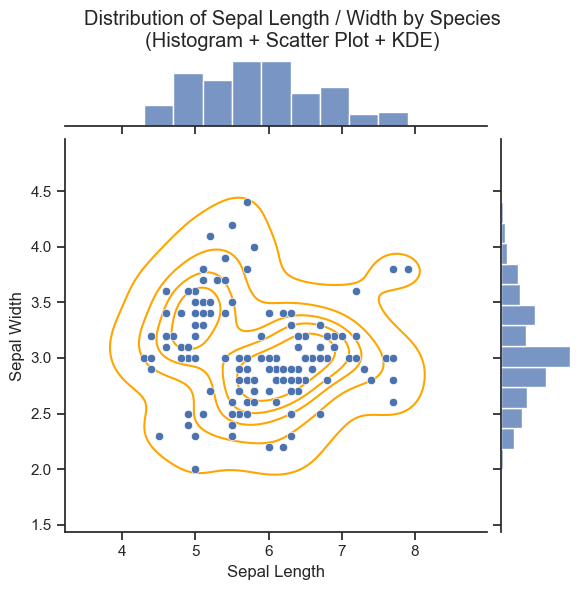

In [264]:
# Query 11

# create scatterplot of sepal length and width
joint_scat = sns.jointplot(data=iris, x='sepal.length', y='sepal.width')

# add kdeplot player to scatterplot
joint_scat.plot_joint(sns.kdeplot, color='orange', zorder=0, levels=6)

# plot characteristics
joint_scat.set_axis_labels('Sepal Length', 'Sepal Width')
joint_scat.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                           '(Histogram + Scatter Plot + KDE)')
joint_scat.fig.subplots_adjust(top=0.9)

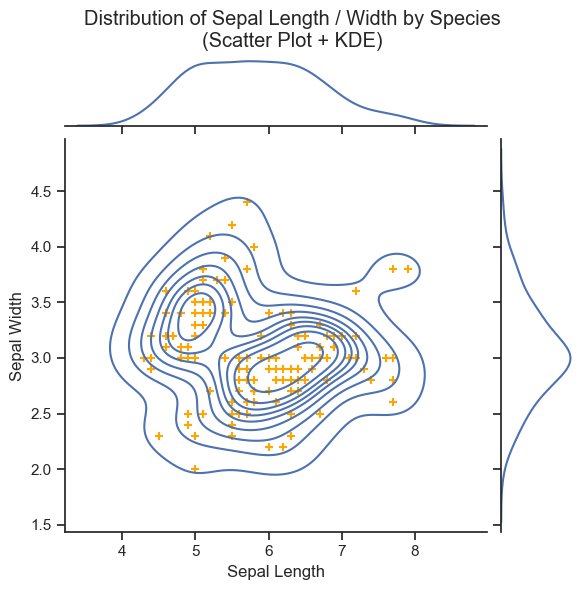

In [265]:
# Query 12

# create kdeplot of sepal length and width
joint_kde = sns.jointplot(data=iris, x='sepal.length', y='sepal.width', kind='kde')

# add scatterplot player to kdeplot
joint_kde.plot_joint(sns.scatterplot, color='orange', marker='+', linewidth=1.5)

# plot characteristics
joint_kde.set_axis_labels('Sepal Length', 'Sepal Width')
joint_kde.fig.suptitle('Distribution of Sepal Length / Width by Species\n'
                       '(Scatter Plot + KDE)')
joint_kde.fig.subplots_adjust(top=0.9)

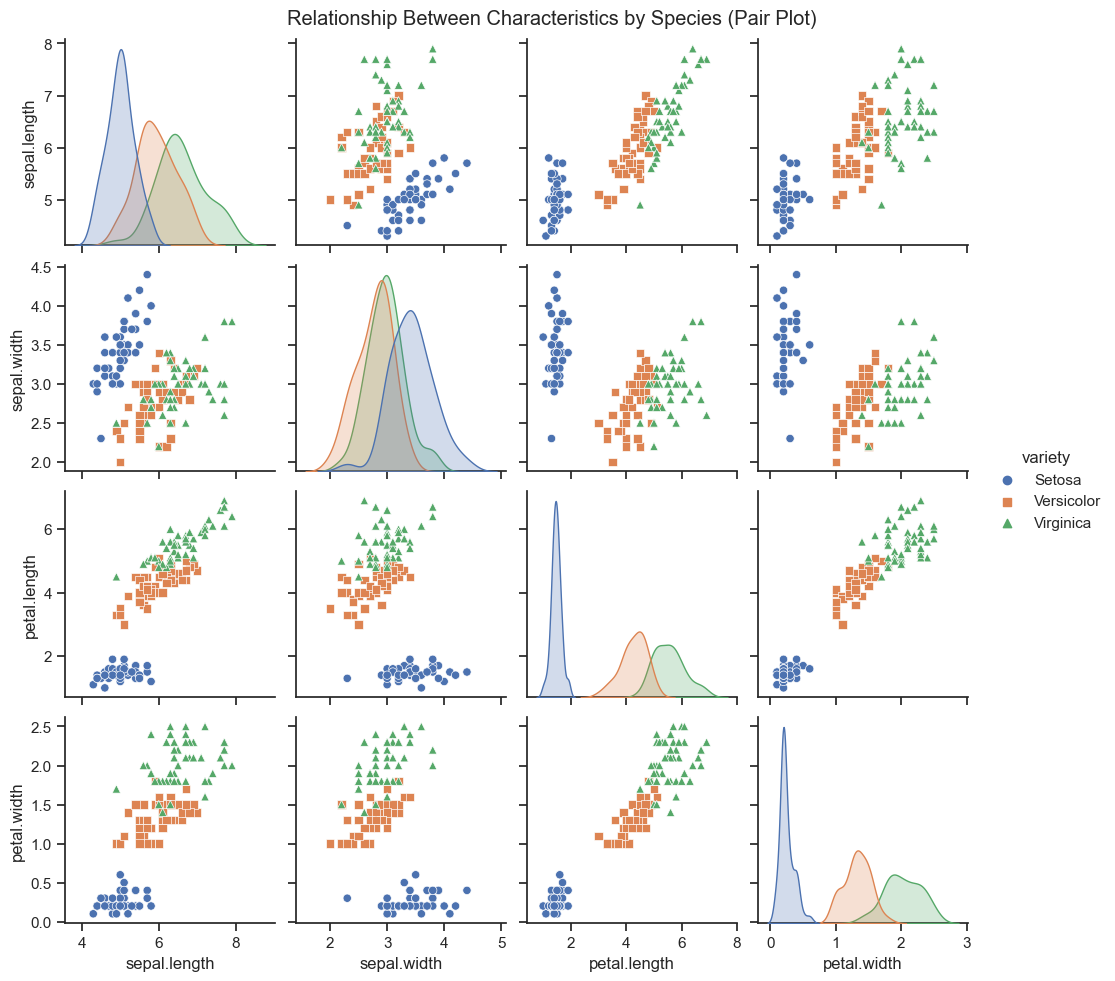

In [272]:
# Query 13

# create pairplot of data
pair = sns.pairplot(
    data=iris, hue='variety', markers=["o", "s", "^"]
)

pair.fig.suptitle('Relationship Between Characteristics by Species (Pair Plot)')
pair.fig.subplots_adjust(top=0.95)

Text(0.5, 1.0, 'Relationship Between Characteristics (Heatmap)')

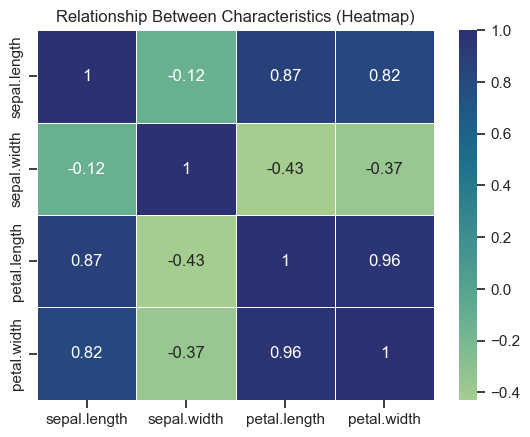

In [275]:
# Query 14

# find correlation between variables of data
correlation = iris.iloc[:, 0:4].corr()

# create heatmap of correlation
heat = sns.heatmap(
    correlation, annot=True, linewidth=.5, cmap="crest"
)

plt.title('Relationship Between Characteristics (Heatmap)')

Text(0.5, 1.0, 'Comparison Between Characteristics by Species')

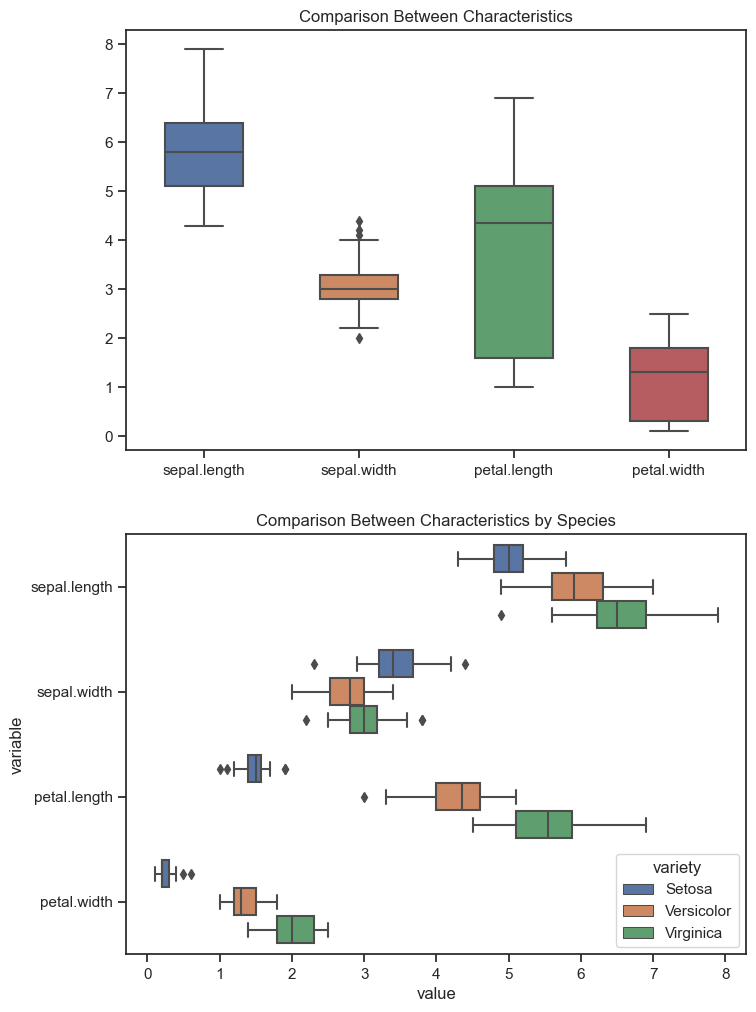

In [305]:
# Query 15

# create two subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# create box plot of data
box = sns.boxplot(
    ax=axes[0], data=iris, width=0.5
)

# create box plot with melted data
iris_long = iris.melt(id_vars=['variety'])
box_hue = sns.boxplot(
    ax=axes[1], data=iris_long, x='value', y='variable', hue='variety'
)

box.set_title('Comparison Between Characteristics')
box_hue.set_title('Comparison Between Characteristics by Species')

'https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19'

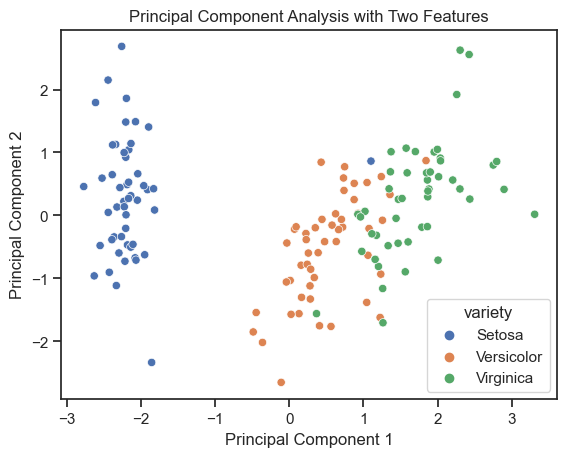

In [332]:
# Query 16

# scale feature coefs
features = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
scaled_features = StandardScaler().fit_transform(features)

# reduce to two principal components
pca_2 = PCA(n_components=2)
pc_2 = pca_2.fit_transform(scaled_features)
pca2_df = pd.DataFrame(
    data=pc_2, columns=['pca1', 'pca2']
)

# create scatter plot of PCA with two features
pca_2_scat = sns.scatterplot(
    x=pca2_df.pca1, y=pca2_df.pca2, hue=iris.variety
).set(
    xlabel='Principal Component 1', ylabel='Principal Component 2',
    title='Principal Component Analysis with Two Features'
)

"""https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19"""

Text(0.5, 0.92, 'Principal Component Analysis with Three Features')

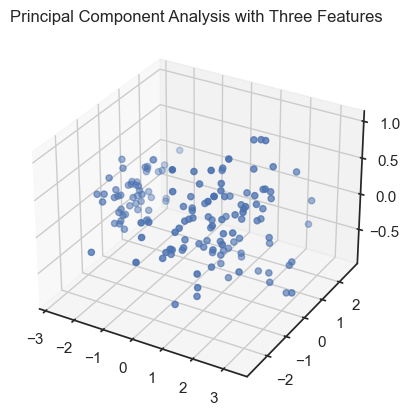

In [331]:
# Query 16-2

# reduce to three principal components
pca_3 = PCA(n_components=3)
pc_3 = pca_3.fit_transform(scaled_features)
pca3_df = pd.DataFrame(
    data=pc_3, columns=['pca1', 'pca2', 'pca3']
)

# create 3D scatter plot of PCA with three features
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
pca_3_scat = ax.scatter(
    pca3_df.pca1, pca3_df.pca2, pca3_df.pca3
)

plt.title('Principal Component Analysis with Three Features')